In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for plotting facilities

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk(r'C:/Users/G. Cao/01_test/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

C:/Users/G. Cao/01_test/data\airport-frequencies.csv
C:/Users/G. Cao/01_test/data\airports.csv
C:/Users/G. Cao/01_test/data\cifar-10-python.tar.gz
C:/Users/G. Cao/01_test/data\runways.csv
C:/Users/G. Cao/01_test/data\Untitled.ipynb
C:/Users/G. Cao/01_test/data\Wholesale customers data.csv
C:/Users/G. Cao/01_test/data\.ipynb_checkpoints\Untitled-checkpoint.ipynb


In [7]:
data = 'C:/Users/G. Cao/01_test/data\Wholesale customers data.csv'

df = pd.read_csv(data)

In [8]:
df.shape

(440, 8)

In [9]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


We can see that Channel variable contains values as 1 and 2.

These two values classify the customers from two different channels as

1 for Horeca (Hotel/Retail/Café) customers and
2 for Retail channel (nominal) customers.

In [11]:
#4.3.3 Summary of dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [12]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [13]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Declare feature vector and target variable ¶

In [14]:
X = df.drop('Channel', axis=1)

y = df['Channel']

In [18]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [19]:
y.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

In [20]:
# convert labels into binary values

y[y == 2] = 0

y[y == 1] = 1

In [21]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

Now, we will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.

We will do it as follows -

In [22]:
# import XGBoost
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [23]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [24]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

[14:02:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Program_Files\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
# we can view the parameters of the xgb trained model as follows -

print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [26]:
# make predictions on test data

y_pred = xgb_clf.predict(X_test)

In [27]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8864


## k-fold Cross Validation using XGBoost 

To build more robust models with XGBoost, we should always perform k-fold cross validation.

In this way, we ensure that the original training dataset is used for both training and validation.

Also, each entry is used for validation just once.

XGBoost supports k-fold cross validation using the cv() method.

In this method, we will specify several parameters which are as follows:-

nfolds - This parameter specifies the number of cross-validation sets we want to build.

num_boost_round - It denotes the number of trees we build.

metrics - It is the performance evaluation metrics to be considered during CV.

as_pandas - It is used to return the results in a pandas DataFrame.

early_stopping_rounds - This parameter stops training of the model early if the hold-out metric does not improve for a given number of rounds.

seed - This parameter is used for reproducibility of results.

In [28]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [29]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.914998,0.009704,0.880965,0.021050
1,0.934374,0.013263,0.923561,0.022810
2,0.936252,0.013723,0.924433,0.025777
3,0.943878,0.009032,0.927152,0.022228
4,0.957880,0.008845,0.935191,0.016437


## Feature importance with XGBoost 

XGBoost provides a way to examine the importance of each feature in the original dataset within the model.

It involves counting the number of times each feature is split on across all boosting trees in the model.

Then we visualize the result as a bar graph, with the features ordered according to how many times they appear.

XGBoost has a plot_importance() function that helps us to achieve this task.

Then we can visualize the features that has been given the highest important score among all the features.

Thus XGBoost provides us a way to do feature selection.

We will proceed as follows:-

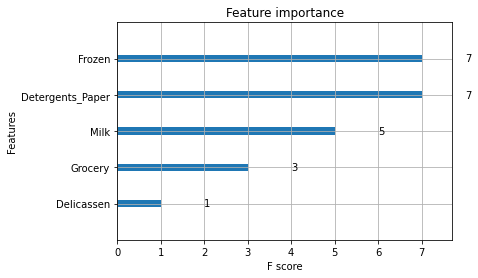

<Figure size 1152x864 with 0 Axes>

In [32]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

We can see that the feature Delicassesn has been given the highest importance score among all the features.

Based upon this importance score, we can select the features with highest importance score and discard the redundant ones.

Thus XGBoost also gives us a way to do feature selection.

In this kernel, we implement XGBoost with Python and Scikit-Learn to classify the customers from two different channels as Horeca (Hotel/Retail/Café) customers or Retail channel (nominal) customers.

The y labels contain values as 1 and 2. We have converted them into 0 and 1 for further analysis.

We have trained the XGBoost classifier and found the accuracy score to be 91.67%.

We have performed k-fold cross-validation with XGBoost.

We have find the most important feature in XGBoost. We did it using the plot_importance() function in XGBoost that helps us to achieve this task.